#### Goal - read puyallup data

In [13]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sys import platform
import io
import datetime

if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/puyallup/"
    output_string = "/home/maria/Documents/output/pied_piper/puyallup/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/puyallup/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/puyallup/"

In [14]:
# #read file in Windows
try:
    df = pd.read_excel(
   io=data_string + "puyallup_chinook_2004-2018.xlsx",
   sheet_name ='2004',
    header = [3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df.head()


,Date,Flow (cfs),Secchi depth (cm),Hours of day,# of fish caught (day),CPUE (Day),Hours of night,# of fish caught (night),CPUE (night),TOTAL CPUE,...,Hours of Daylight,# of Fish Caught,CPUE (Day).1,Hours of Night,# of Fish Caught.1,CPUE (Night),Total CPUE,Total Hours,Unnamed: 28,Unnamed: 29
0,2004-02-29,1050.0,150,8.5,0.0,0,13.75,0.0,0,0,...,8.5,0,0,13.75,0.0,0,0,22.25,NaN,NaN
1,2004-03-01,982.0,150,10.75,0.0,0,15.25,2.0,0.131148,0.0769231,...,10.75,0,0,15.25,0.0,0,0,26,NaN,NaN
2,2004-03-02,923.0,150,10.25,1.0,0.097561,13.75,0.0,0,0.0416667,...,10.25,0,0,13.75,0.0,0,0,24,NaN,NaN
3,2004-03-03,955.0,150,10.25,0.0,0,14.25,0.0,0,0,...,10.25,0,0,14.25,0.0,0,0,24.5,NaN,NaN
4,2004-03-04,1300.0,150,9.25,0.0,0,15,0.0,0,0,...,9.25,0,0,15,0.0,0,0,24.25,NaN,NaN


In [15]:
columns = list(df)
print(columns)

df.rename(columns = {
    'Flow (cfs)':'flow',
    'Secchi depth (cm)':'secchi_depth',
    'Hours of  day':'In_day',
    '# of fish caught (day)':'chinook0_wild_num_day',
    'CPUE (Day)':'chinook0_wild_perhour_day',
    '# of fish caught (night)': 'chinook0_wild_num_night',
    'CPUE (night)':'chinook0_wild_perhour_night',
    'TOTAL CPUE':'chinook0_wild_perhour',
    '# of Fish Caught':'chinook0_hatchery_num_day',
    'CPUE (Day).1':'chinook0_hatchery_perhour_day',
    'Hours of Night':'In_night',
    '# of Fish Caught.1':'chinook0_hatchery_num_night',
    'CPUE (Night)':'chinook0_hatchery_perhour_night',
    'Total CPUE':'chinook0_hatchery_perhour',
    'Total Hours':'In',
    'Estimated Capture Efficiency':'trap_efficiency'
    
}, inplace = True)

df.head()

['Date', 'Flow (cfs)', 'Secchi depth (cm)', 'Hours of  day', '# of fish caught (day)', 'CPUE (Day)', 'Hours of night', '# of fish caught (night)', 'CPUE (night)', 'TOTAL CPUE', 'TOTAL HOURS', 'Estimated Capture Efficiency', 'Daily Estimated Production', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Date.1', 'Flow (cfs).1', 'Secchi Disk Depth (cm)', 'Hours of  Daylight', '# of Fish Caught', 'CPUE (Day).1', 'Hours of Night', '# of Fish Caught.1', 'CPUE (Night)', 'Total CPUE', 'Total Hours', 'Unnamed: 28', 'Unnamed: 29']


,Date,flow,secchi_depth,In_day,chinook0_wild_num_day,chinook0_wild_perhour_day,Hours of night,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_wild_perhour,...,Hours of Daylight,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,In_night,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_hatchery_perhour,In,Unnamed: 28,Unnamed: 29
0,2004-02-29,1050.0,150,8.5,0.0,0,13.75,0.0,0,0,...,8.5,0,0,13.75,0.0,0,0,22.25,NaN,NaN
1,2004-03-01,982.0,150,10.75,0.0,0,15.25,2.0,0.131148,0.0769231,...,10.75,0,0,15.25,0.0,0,0,26,NaN,NaN
2,2004-03-02,923.0,150,10.25,1.0,0.097561,13.75,0.0,0,0.0416667,...,10.25,0,0,13.75,0.0,0,0,24,NaN,NaN
3,2004-03-03,955.0,150,10.25,0.0,0,14.25,0.0,0,0,...,10.25,0,0,14.25,0.0,0,0,24.5,NaN,NaN
4,2004-03-04,1300.0,150,9.25,0.0,0,15,0.0,0,0,...,9.25,0,0,15,0.0,0,0,24.25,NaN,NaN


In [16]:
df_subset = df[['Date', 'flow', 'secchi_depth','In_day','In_night','In',
                'chinook0_wild_num_day','chinook0_wild_perhour_day',
                'chinook0_wild_num_night','chinook0_wild_perhour_night',
                'chinook0_hatchery_num_day','chinook0_hatchery_perhour_day',
                'chinook0_hatchery_num_night','chinook0_hatchery_perhour_night',
                'chinook0_wild_perhour','chinook0_hatchery_perhour', 'trap_efficiency']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_subset)



,Date,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour,trap_efficiency
0,2004-02-29,1050.0,150,8.5,13.75,22.25,0.0,0,0.0,0,0,0,0.0,0,0,0,0.00460005
1,2004-03-01,982.0,150,10.75,15.25,26,0.0,0,2.0,0.131148,0,0,0.0,0,0.0769231,0,0.00460005
2,2004-03-02,923.0,150,10.25,13.75,24,1.0,0.097561,0.0,0,0,0,0.0,0,0.0416667,0,0.00460005
3,2004-03-03,955.0,150,10.25,14.25,24.5,0.0,0,0.0,0,0,0,0.0,0,0,0,0.00460005
4,2004-03-04,1300.0,150,9.25,15,24.25,0.0,0,0.0,0,0,0,0.0,0,0,0,0.00460005
5,2004-03-05,1360.0,150,8.75,14,22.75,0.0,0,2.0,0.142857,0,0,0.0,0,0.0879121,0,0.00460005
6,2004-03-06,1340.0,150,10.75,14.75,25.5,0.0,0,0.0,0,0,0,0.0,0,0,0,0.00460005
7,2004-03-07,1230.0,150,7.5,16.25,23.75,0.0,0,0.0,0,0,0,0.0,0,0,0,0.00460005
8,2004-03-08,1370.0,150,7.75,14.25,22,2.0,0.258065,0.0,0,0,0,0.0,0,0.0909091,0,0.00460005
9,2004-03-09,1630.0,150,10.75,15.75,26.5,0.0,0,2.0,0.126984,0,0,0.0,0,0.0754717,0,0.00460005


In [17]:
df_subset.loc[(df_subset['In_day'] == '-'),'chinook0_wild_num_day':'chinook0_wild_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == '-'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_night'] == '-'),'chinook0_wild_num_night':'chinook0_wild_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == '-'),'chinook0_hatchery_num_night':'chinook0_hatchery_perhour_night'] =np.nan
# df_subset['chinook0_wild_perhour'].loc[(df_subset['In_day'] == '-')][(df_subset['In_night'] == '-')] = np.nan
# df_subset['chinook0_hatchery_perhour'].loc[(df_subset['In_day'] == '-')][(df_subset['In_night'] == '-')] = np.nan
# df_subset['In'].loc[(df_subset['In_day'] == '-')][(df_subset['In_night'] == '-')] = np.nan
df_subset = df_subset.replace({'-':np.nan})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_subset)

/home/maria/miniconda3/envs/analysis/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour,trap_efficiency
0,2004-02-29,1050.0,150.00,8.50,13.75,22.25,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600
1,2004-03-01,982.0,150.00,10.75,15.25,26.00,0.0,0.000000,2.0,0.131148,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.004600
2,2004-03-02,923.0,150.00,10.25,13.75,24.00,1.0,0.097561,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.041667,0.000000,0.004600
3,2004-03-03,955.0,150.00,10.25,14.25,24.50,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600
4,2004-03-04,1300.0,150.00,9.25,15.00,24.25,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600
5,2004-03-05,1360.0,150.00,8.75,14.00,22.75,0.0,0.000000,2.0,0.142857,0.0,0.000000,0.0,0.000000,0.087912,0.000000,0.004600
6,2004-03-06,1340.0,150.00,10.75,14.75,25.50,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600
7,2004-03-07,1230.0,150.00,7.50,16.25,23.75,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600
8,2004-03-08,1370.0,150.00,7.75,14.25,22.00,2.0,0.258065,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.000000,0.004600
9,2004-03-09,1630.0,150.00,10.75,15.75,26.50,0.0,0.000000,2.0,0.126984,0.0,0.000000,0.0,0.000000,0.075472,0.000000,0.004600


In [18]:
df_subset['chinook0_wild_perhour_day_estimate'] = (df_subset['chinook0_wild_perhour_day']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_wild_perhour_night_estimate'] = (df_subset['chinook0_wild_perhour_night']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_wild_perhour_estimate'] = (df_subset['chinook0_wild_perhour']/
                                                   df_subset['trap_efficiency'])

df_subset['chinook0_hatchery_perhour_day_estimate'] = (df_subset['chinook0_hatchery_perhour_day']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_hatchery_perhour_night_estimate'] = (df_subset['chinook0_hatchery_perhour_night']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_hatchery_perhour_estimate'] = (df_subset['chinook0_hatchery_perhour']/
                                                   df_subset['trap_efficiency'])

print(df_subset[['chinook0_wild_perhour_estimate','chinook0_hatchery_perhour_estimate','trap_efficiency']])

     chinook0_wild_perhour_estimate  chinook0_hatchery_perhour_estimate  \
0                          0.000000                                 0.0   
1                         16.722222                                 0.0   
2                          9.057870                                 0.0   
3                          0.000000                                 0.0   
4                          0.000000                                 0.0   
..                              ...                                 ...   
161                        0.000000                                 0.0   
162                        0.000000                                 0.0   
163                        0.000000                                 0.0   
164                             NaN                                 NaN   
165                             NaN                                 NaN   

     trap_efficiency  
0           0.004600  
1           0.004600  
2           0.004600  
3      

In [20]:
# i think there is a mistake when calculating chinook_perhour_total. it should be 
#(chinook_num_day+chinook_num_night)/In

# no - perhour total (which is only to calculate fractions) is different from perhour

In [25]:
df_subset['chinook0_wild_perhour_total'] = (df_subset['chinook0_wild_perhour_day'] + 
                                            df_subset['chinook0_wild_perhour_night'])

df_subset['chinook0_hatchery_perhour_total'] = (df_subset['chinook0_hatchery_perhour_day'] + 
                                            df_subset['chinook0_hatchery_perhour_night'])

#these totals are not the same as chinook0_wild_perhour and it is only used to calculate fractions

df_subset['chinook0_wild_day_fraction'] = np.nan
df_subset['chinook0_hatchery_day_fraction'] = np.nan
n = len(df_subset['chinook0_wild_perhour_total'])

for i in range(n):
    if df_subset['chinook0_wild_perhour_day'].loc[i]==0 and df_subset['chinook0_wild_perhour_total'].loc[i] == 0:
        df_subset['chinook0_wild_day_fraction'].loc[i] = np.nan
        
    else:
        df_subset['chinook0_wild_day_fraction'].loc[i] = (df_subset['chinook0_wild_perhour_day'].loc[i]/
                                                          df_subset['chinook0_wild_perhour_total'].loc[i])
        
    if df_subset['chinook0_hatchery_perhour_day'].loc[i]==0 and df_subset['chinook0_hatchery_perhour_total'].loc[i] == 0:
        df_subset['chinook0_hatchery_day_fraction'].loc[i] = np.nan
        
    else:
        df_subset['chinook0_hatchery_day_fraction'].loc[i] = (df_subset['chinook0_hatchery_perhour_day'].loc[i]/
                                                          df_subset['chinook0_hatchery_perhour_total'].loc[i])
        
df_subset = df_subset.drop(['chinook0_wild_perhour_total','chinook0_hatchery_perhour_total'],axis = 1)

/home/maria/miniconda3/envs/analysis/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
df_subset = df_subset.iloc[:-2]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_subset)

,Date,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour,trap_efficiency,chinook0_wild_perhour_day_estimate,chinook0_wild_perhour_night_estimate,chinook0_wild_perhour_estimate,chinook0_hatchery_perhour_day_estimate,chinook0_hatchery_perhour_night_estimate,chinook0_hatchery_perhour_estimate,chinook0_wild_day_fraction,chinook0_hatchery_day_fraction
0,2004-02-29,1050.0,150.00,8.50,13.75,22.25,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,2004-03-01,982.0,150.00,10.75,15.25,26.00,0.0,0.000000,2.0,0.131148,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.004600,0.000000,28.510018,16.722222,0.000000,0.000000,0.000000,0.000000,NaN
2,2004-03-02,923.0,150.00,10.25,13.75,24.00,1.0,0.097561,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.041667,0.000000,0.004600,21.208672,0.000000,9.057870,0.000000,0.000000,0.000000,2.341463,NaN
3,2004-03-03,955.0,150.00,10.25,14.25,24.50,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4,2004-03-04,1300.0,150.00,9.25,15.00,24.25,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
5,2004-03-05,1360.0,150.00,8.75,14.00,22.75,0.0,0.000000,2.0,0.142857,0.0,0.000000,0.0,0.000000,0.087912,0.000000,0.004600,0.000000,31.055556,19.111111,0.000000,0.000000,0.000000,0.000000,NaN
6,2004-03-06,1340.0,150.00,10.75,14.75,25.50,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
7,2004-03-07,1230.0,150.00,7.50,16.25,23.75,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
8,2004-03-08,1370.0,150.00,7.75,14.25,22.00,2.0,0.258065,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.000000,0.004600,56.100359,0.000000,19.762626,0.000000,0.000000,0.000000,2.838710,NaN
9,2004-03-09,1630.0,150.00,10.75,15.75,26.50,0.0,0.000000,2.0,0.126984,0.0,0.000000,0.0,0.000000,0.075472,0.000000,0.004600,0.000000,27.604938,16.406709,0.000000,0.000000,0.000000,0.000000,NaN


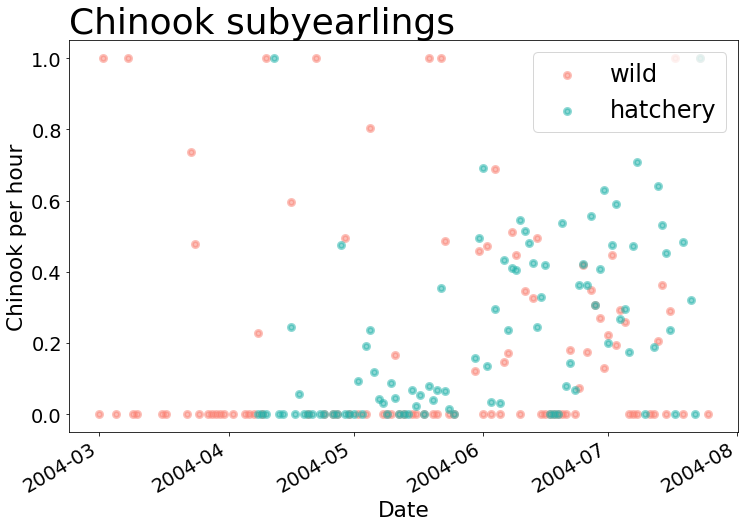

In [26]:
#plotting all of them

fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.scatter(
    df_subset['Date'], df_subset['chinook0_wild_day_fraction'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


ax1.scatter(df_subset['Date'], df_subset['chinook0_hatchery_day_fraction'], color = 'lightseagreen', 
         label = 'hatchery', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


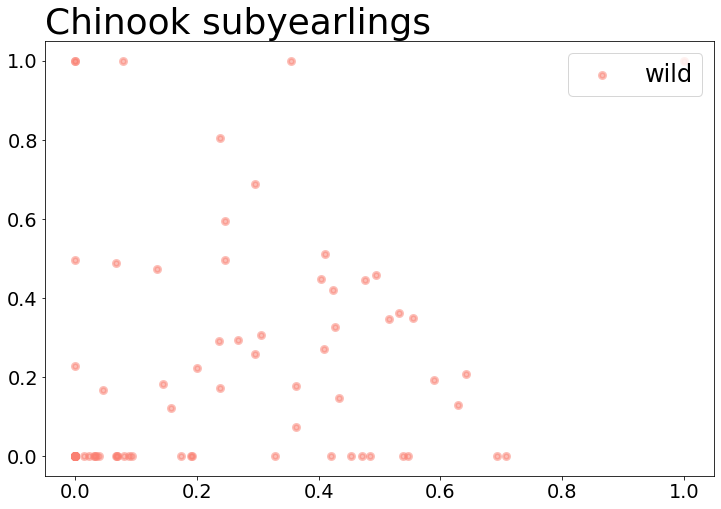

In [27]:
fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.scatter(
    df_subset['chinook0_hatchery_day_fraction'], df_subset['chinook0_wild_day_fraction'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


# ax1.scatter(df_subset['Date'], df_subset['chinook0_hatchery_day_fraction'], color = 'lightseagreen', 
#          label = 'hatchery', alpha = 0.5, linewidth = lw)

# plt.gcf().autofmt_xdate()
# plt.xlabel('Date', size = 0.9*fs)
# plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [28]:
#save the data

df_subset.to_csv(data_string + "2004_puyallup.csv")  